# Surface

In [ ]:
import nibabel as nib
import pyvista as pv
import numpy as np
import napari

Load NIfTI file

In [ ]:
img = nib.load('data/Patient test 1-liver post ablation_CORRIGE.nii.gz')
data = img.get_fdata()
spacing = img.header.get_zooms() # Récupère la taille réelle des voxels (ex: 0.8, 0.8, 1.5)

Extract surface via Marching Cubes algorithm

In [ ]:
grid = pv.ImageData()
grid.dimensions = np.array(data.shape)
grid.spacing = spacing  # CRUCIAL pour ne pas déformer le foie
grid.point_data["values"] = data.flatten(order="F")

mesh = grid.contour([0.5])

# 4. Lissage préservant le volume (Taubin)
# Indispensable pour l'aspect organique sans perdre la précision médicale
mesh_smooth = mesh.smooth_taubin(n_iter=40, pass_band=0.05)

View surface

In [5]:
viewer = napari.Viewer()

faces_napari = mesh_smooth.faces.reshape(-1, 4)[:, 1:]
verts_napari = mesh_smooth.points

viewer.add_surface((verts_napari, faces_napari), name='Mesh Lissé Taubin', blending='additive')

<Surface layer 'Mesh Lissé Taubin' at 0x16adb94e0>

Save file

In [7]:
# 5. Sauvegarde en format standard (STL ou OBJ)
mesh_smooth.save("data/Patient test 1-liver post ablation_CORRIGE_mesh.stl")

# Volume (tetraedrons)

/opt/anaconda3/envs/doc/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:56: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


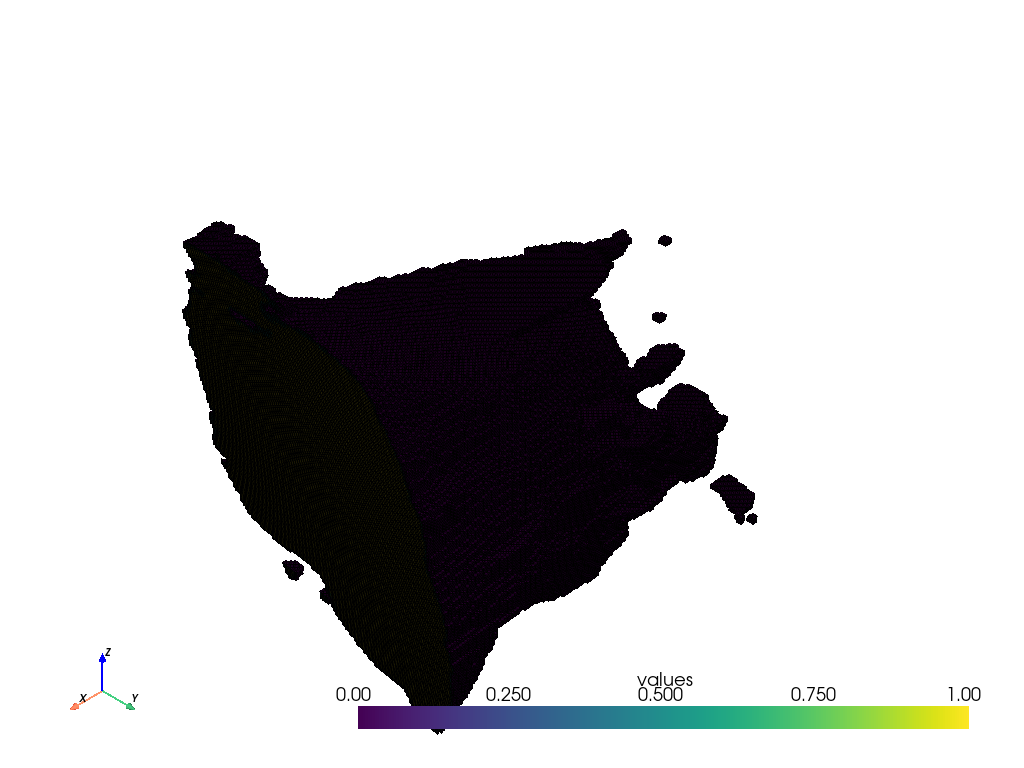

In [ ]:
# 2. On extrait uniquement les voxels "pleins" (valeur > 0.5)
# Cela crée un UnstructuredGrid composé de petits cubes (Hexaèdres)
volumetric_mesh = grid.threshold(0.5)

# 3. (Optionnel) Convertir les cubes en Tétraèdres pour la simulation
tetra_mesh = volumetric_mesh.triangulate()

# Visualisation : on peut maintenant couper dedans et voir que c'est "plein"
tetra_mesh.clip(normal='x').plot(show_edges=True)